___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Data Wrangling

In [ ]:
df = df[['Review Text','Recommended IND']]
df

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
df.columns

Index(['Review Text', 'Recommended IND'], dtype='object')

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [ ]:
df['Recommended IND'].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

In [ ]:
df['Recommended IND'] = df['Recommended IND'].map({1:0, 0:1})

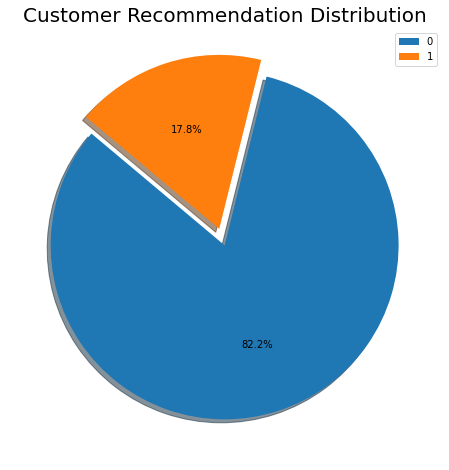

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Recommended IND'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['0', '1'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

In [ ]:
df['Recommended IND'].value_counts(normalize=True)

0    0.822362
1    0.177638
Name: Recommended IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [ ]:
df.columns

Index(['review_text', 'recommended_ind'], dtype='object')

In [ ]:
df.shape

(23486, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recommended_ind,23486.0,0.177638,0.382216,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
review_text,22641,22634,Perfect fit and i've gotten so many compliment...,3


### Missing Value Detection

In [ ]:
df.isnull().sum()

review_text        845
recommended_ind      0
dtype: int64

In [ ]:
df['review_text'].isnull().value_counts()

False    22641
True       845
Name: review_text, dtype: int64

In [ ]:
df['recommended_ind'].isnull().value_counts()

False    23486
Name: recommended_ind, dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

review_text        0
recommended_ind    0
dtype: int64

In [ ]:
df["review_text"].str.isspace().sum()

0

In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.duplicated().sum()

0

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
text = cleaning_fsa(str(df["review_text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name length dtype object'

In [ ]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)
df["review_text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [ ]:
df.head(3)

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
2,high hope dress really wanted work initially o...,1


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [ ]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

dress       11316
fit         10087
size         9346
love         8964
top          8254
            ...  
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 16758, dtype: int64

### Detect Reviews (positive and negative separately)

In [ ]:
df[df["recommended_ind"] == 0]

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0
...,...,...
23479,wasnt sure ordering skirt couldnt see person f...,0
23481,happy snag dress great price easy slip flatter...,0
23482,reminds maternity clothes soft stretchy shiny ...,0
23484,bought dress wedding summer cute unfortunately...,0


In [ ]:
df[df["recommended_ind"] == 1]

,review_text,recommended_ind
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one petite foot tall us...,1
10,dress run small esp zipper area run ordered sp...,1
22,first pullover styling side zipper wouldnt pur...,1
25,loved material didnt really look long dress pu...,1
...,...,...
23449,tried color really pretty fun donset want pair...,1
23450,wanted love jacket soft great color unfortunat...,1
23460,purchased good price typically love maeve winw...,1
23478,surprised positive review product terrible cut...,1


In [ ]:
df["recommended_ind"].value_counts()

0    18534
1     4100
Name: recommended_ind, dtype: int64

### Collect Words (positive and negative separately)

In [ ]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complimen

In [ ]:
neg_words = " ".join(df[df["recommended_ind"] == 0].review_text).split()
neg_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [ ]:
pos_words =" ".join(df[df["recommended_ind"] == 1].review_text).split()
pos_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
review_text = df["review_text"]

In [ ]:
all_words = " ".join(review_text)

In [ ]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


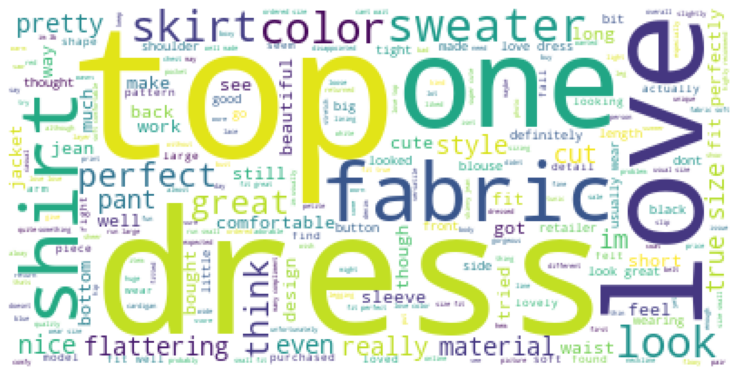

In [ ]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["review_text"]
y= df["recommended_ind"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,abhor,ability,able,abnormal,abnormally,abo,abolutely,abou,abovetheknee,abovetheshoulders,abroad,abruptly,absence,...,zara,zed,zero,zig,zigzag,zigzagging,zillion,zip,zipbutton,zipepr,ziphoodie,ziploc,zipped,zippedfor,zipper,zippered,zipperi,zipperone,zippie,zipping,zombie,zone,zoolanders,zoom,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,ab,abbey,abby,abck,abdomen,abdominal,abercrombie,abhor,ability,able,abnormal,abnormally,abo,abolutely,abou,abovetheknee,abovetheshoulders,abroad,abruptly,absence,...,zara,zed,zero,zig,zigzag,zigzagging,zillion,zip,zipbutton,zipepr,ziphoodie,ziploc,zipped,zippedfor,zipper,zippered,zipperi,zipperone,zippie,zipping,zombie,zone,zoolanders,zoom,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve


## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3707
           1       0.61      0.80      0.69       820

    accuracy                           0.87      4527
   macro avg       0.78      0.84      0.81      4527
weighted avg       0.89      0.87      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14827
           1       0.74      0.97      0.84      3280

    accuracy                           0.93     18107
   macro avg       0.87      0.95      0.90     18107
weighted avg       0.95      0.93      0.94     18107



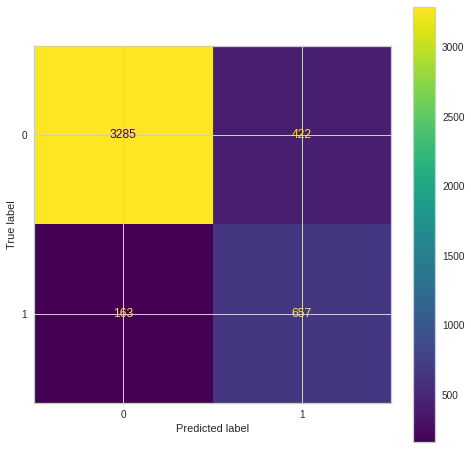

In [ ]:
print("LOG MODEL")

eval(log, X_train_count, X_test_count)

In [ ]:
def eval2(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [ ]:
print("LOG MODEL")

eval2(log, X_train_count, X_test_count)

LOG MODEL
[[3285  422]
 [ 163  657]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3707
           1       0.61      0.80      0.69       820

    accuracy                           0.87      4527
   macro avg       0.78      0.84      0.81      4527
weighted avg       0.89      0.87      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14827
           1       0.74      0.97      0.84      3280

    accuracy                           0.93     18107
   macro avg       0.87      0.95      0.90     18107
weighted avg       0.95      0.93      0.94     18107



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


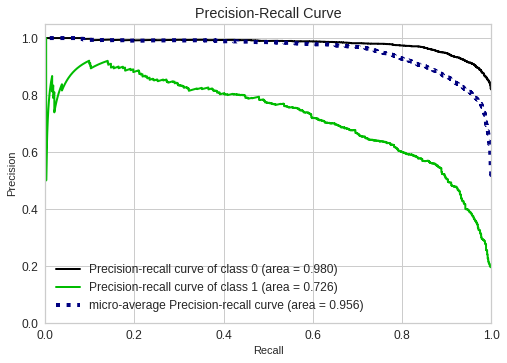

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL BALANCED")
eval2(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[3164  543]
 [ 115  705]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      3707
           1       0.56      0.86      0.68       820

    accuracy                           0.85      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.85      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14827
           1       0.60      0.88      0.71      3280

    accuracy                           0.87     18107
   macro avg       0.78      0.88      0.82     18107
weighted avg       0.90      0.87      0.88     18107



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    elif i == "accuracy":
        log_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8703276783072141

 precision-0          score for count : 0.948662754226856

 recall-0             score for count : 0.8897979621495254

 f1-0                 score for count : 0.918229132740182

 precision-1          score for count : 0.6124578817230125

 recall-1             score for count : 0.7823170731707318

 f1-1                 score for count : 0.6865805790867633



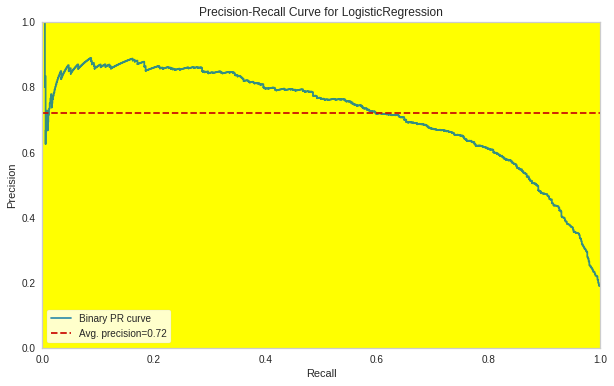

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
print("LOG MODEL")

eval2(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3125  582]
 [ 103  717]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3707
           1       0.55      0.87      0.68       820

    accuracy                           0.85      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.85      0.86      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14827
           1       0.57      0.88      0.69      3280

    accuracy                           0.86     18107
   macro avg       0.77      0.87      0.80     18107
weighted avg       0.90      0.86      0.87     18107



In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    elif i == "accuracy":
        log_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8621535063500827

 precision-0          score for tfidf : 0.9617867995820498

 recall-0             score for tfidf : 0.8660561487228626

 f1-0                 score for tfidf : 0.9113800695513319

 precision-1          score for tfidf : 0.5831709153075952

 recall-1             score for tfidf : 0.8445121951219512

 f1-1                 score for tfidf : 0.689727680213284



## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 

In [ ]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [ ]:
print("NB MODEL")

eval2(nb, X_train_count, X_test_count)

NB MODEL
[[3707    0]
 [ 805   15]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3707
           1       1.00      0.02      0.04       820

    accuracy                           0.82      4527
   macro avg       0.91      0.51      0.47      4527
weighted avg       0.85      0.82      0.75      4527

Train_Set
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     14827
           1       0.96      0.03      0.06      3280

    accuracy                           0.82     18107
   macro avg       0.89      0.52      0.48     18107
weighted avg       0.85      0.82      0.75     18107



In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    elif i == "accuracy":
        nb_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8827534923167507

 precision-0          score for count : 0.9223948091250032

 recall-0             score for count : 0.9355242000431339

 f1-0                 score for count : 0.9289020987873611

 precision-1          score for count : 0.6892157338229679

 recall-1             score for count : 0.6442073170731708

 f1-1                 score for count : 0.6657729949336719



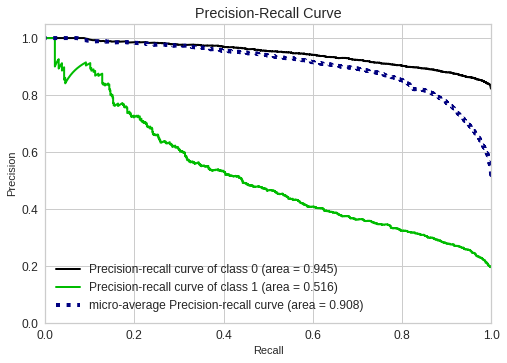

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

### TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [ ]:
print("NB MODEL")
eval2(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3707    0]
 [ 802   18]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3707
           1       1.00      0.02      0.04       820

    accuracy                           0.82      4527
   macro avg       0.91      0.51      0.47      4527
weighted avg       0.85      0.82      0.75      4527

Train_Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     14827
           1       0.99      0.06      0.11      3280

    accuracy                           0.83     18107
   macro avg       0.91      0.53      0.51     18107
weighted avg       0.86      0.83      0.76     18107



In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    elif i == "accuracy":
        nb_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8677858757561984

 precision-0          score for tfidf : 0.9071295217751114

 recall-0             score for tfidf : 0.9341741263787613

 f1-0                 score for tfidf : 0.9204381682460493

 precision-1          score for tfidf : 0.6572015248628557

 recall-1             score for tfidf : 0.5676829268292682

 f1-1                 score for tfidf : 0.6088915626164643



## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")

eval2(svc, X_train_count, X_test_count)

SVC MODEL
[[3223  484]
 [ 133  687]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3707
           1       0.59      0.84      0.69       820

    accuracy                           0.86      4527
   macro avg       0.77      0.85      0.80      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14827
           1       0.66      0.93      0.77      3280

    accuracy                           0.90     18107
   macro avg       0.82      0.91      0.85     18107
weighted avg       0.92      0.90      0.91     18107



In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    elif i == "accuracy":
        svc_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8650809509718081

 precision-0          score for count : 0.9566285334433056

 recall-0             score for count : 0.8748921879365149

 f1-0                 score for count : 0.9138857745550736

 precision-1          score for count : 0.5931880400047354

 recall-1             score for count : 0.8207317073170731

 f1-1                 score for count : 0.688326427073671



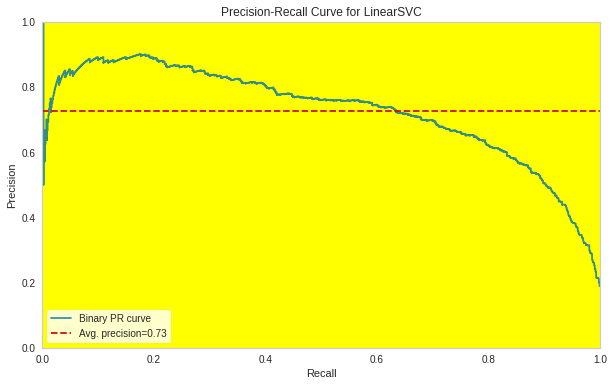

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [ ]:
print("SVC MODEL")

eval2(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3115  592]
 [  99  721]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3707
           1       0.55      0.88      0.68       820

    accuracy                           0.85      4527
   macro avg       0.76      0.86      0.79      4527
weighted avg       0.89      0.85      0.86      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14827
           1       0.56      0.89      0.69      3280

    accuracy                           0.85     18107
   macro avg       0.77      0.87      0.80     18107
weighted avg       0.90      0.85      0.87     18107



In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    elif i == "accuracy":
        svc_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8418296414483619

 precision-0          score for tfidf : 0.962858003037861

 recall-0             score for tfidf : 0.8392133336609329

 f1-0                 score for tfidf : 0.8967462763352827

 precision-1          score for tfidf : 0.5407788659388458

 recall-1             score for tfidf : 0.8536585365853657

 f1-1                 score for tfidf : 0.6619105345701314



## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")
eval2(rf, X_train_count, X_test_count)

RF MODEL
[[3225  482]
 [ 164  656]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3707
           1       0.58      0.80      0.67       820

    accuracy                           0.86      4527
   macro avg       0.76      0.83      0.79      4527
weighted avg       0.88      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     14827
           1       0.65      0.88      0.75      3280

    accuracy                           0.89     18107
   macro avg       0.81      0.89      0.84     18107
weighted avg       0.91      0.89      0.90     18107



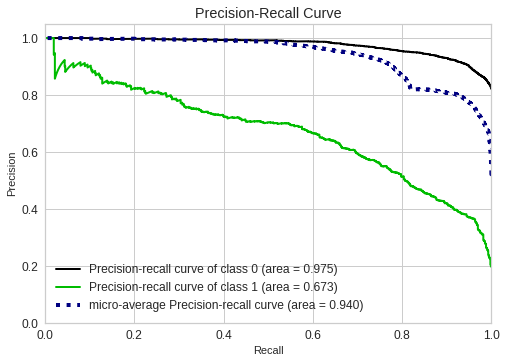

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    elif i == "accuracy":
        rf_count_acc= scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8555264787623822

 precision-0          score for count : 0.9476658101381835

 recall-0             score for count : 0.8717219809209731

 f1-0                 score for count : 0.9080503365140471

 precision-1          score for count : 0.575405300915087

 recall-1             score for count : 0.7823170731707317

 f1-1                 score for count : 0.6627090738781354



### TF-IDF

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
print("RF MODEL")

eval2(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3182  525]
 [ 176  644]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3707
           1       0.55      0.79      0.65       820

    accuracy                           0.85      4527
   macro avg       0.75      0.82      0.77      4527
weighted avg       0.88      0.85      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14827
           1       0.60      0.88      0.72      3280

    accuracy                           0.87     18107
   macro avg       0.79      0.88      0.82     18107
weighted avg       0.90      0.87      0.88     18107



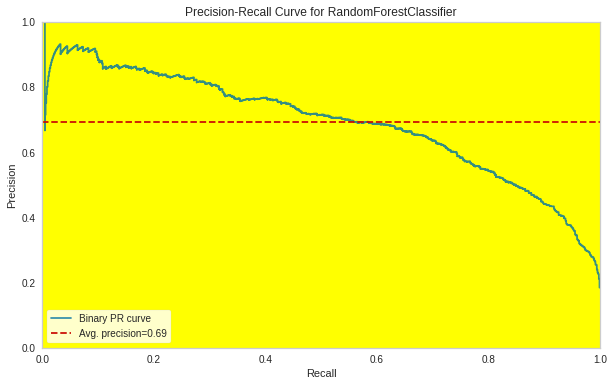

In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    elif i == "accuracy":
        rf_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8374115823802362

 precision-0          score for tfidf : 0.9474483130989609

 recall-0             score for tfidf : 0.8485207065591777

 f1-0                 score for tfidf : 0.895202230789684

 precision-1          score for tfidf : 0.535623853866775

 recall-1             score for tfidf : 0.7871951219512195

 f1-1                 score for tfidf : 0.6371935492200181



## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")

eval2(ada, X_train_count, X_test_count)

Ada MODEL
[[3512  195]
 [ 334  486]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3707
           1       0.71      0.59      0.65       820

    accuracy                           0.88      4527
   macro avg       0.81      0.77      0.79      4527
weighted avg       0.88      0.88      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14827
           1       0.81      0.66      0.72      3280

    accuracy                           0.91     18107
   macro avg       0.87      0.81      0.83     18107
weighted avg       0.90      0.91      0.91     18107



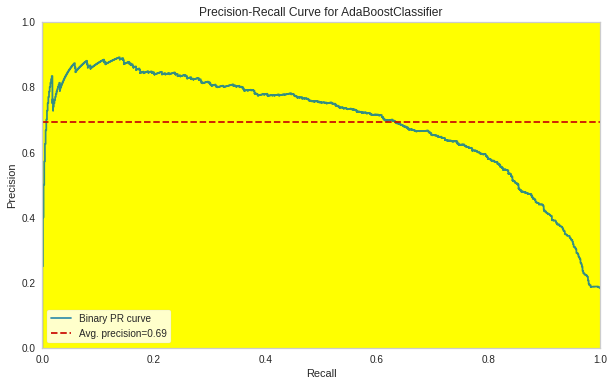

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    elif i == "accuracy":
        ada_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8774513028118527

 precision-0          score for count : 0.9090457872581073

 recall-0             score for count : 0.9448984123257468

 f1-0                 score for count : 0.9266133672847843

 precision-1          score for count : 0.6974160031642566

 recall-1             score for count : 0.572560975609756

 f1-1                 score for count : 0.6285846973533109



### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")

eval2(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3473  234]
 [ 339  481]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3707
           1       0.67      0.59      0.63       820

    accuracy                           0.87      4527
   macro avg       0.79      0.76      0.78      4527
weighted avg       0.87      0.87      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14827
           1       0.81      0.70      0.75      3280

    accuracy                           0.92     18107
   macro avg       0.87      0.83      0.85     18107
weighted avg       0.91      0.92      0.91     18107



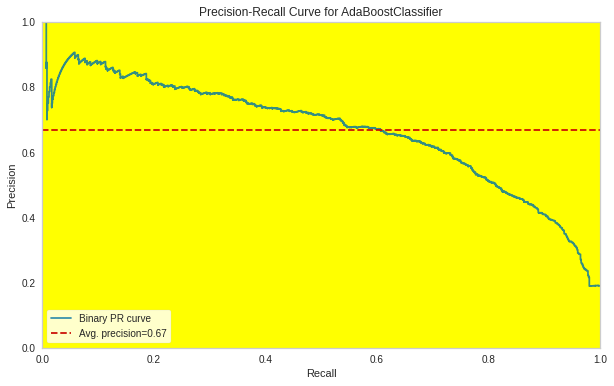

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 300, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    elif i == "accuracy":
        ada_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8722611969212088

 precision-0          score for tfidf : 0.9046934285966317

 recall-0             score for tfidf : 0.9434156153909854

 f1-0                 score for tfidf : 0.923620342730717

 precision-1          score for tfidf : 0.6843001249466776

 recall-1             score for tfidf : 0.5506097560975609

 f1-1                 score for tfidf : 0.6096472394113984



## DL modeling

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df_dl = df0.copy()
df_dl.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df_dl['Recommended IND'] = df_dl['Recommended IND'].map({1:0, 0:1})

In [ ]:
df_dl.dropna(inplace = True)

In [ ]:
df_dl.shape

(22641, 2)

### Tokenization

In [ ]:
X = df_dl['Review Text'].values
y = df_dl['Recommended IND'].values

In [ ]:
num_words = 15001 


tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X_num_tokens[:2]

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95]]

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [ ]:
num_tokens.mean()

60.60699615741354

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

16263

In [ ]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [ ]:
max_tokens = 102

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9564948544675589

In [ ]:
sum(num_tokens < max_tokens)

21295

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(22641, 102)

In [ ]:
len(np.array(X_num_tokens[800]))

20

In [ ]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    5,    6,   16,  548,   10,  676,
          3,   73,    2,   38,  384,    3,  659, 1077,    3,  285,   46,
         78,   31,  150], dtype=int32)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=0)

### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [ ]:
model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True)) 
model.add(GRU(units=12)) 
model.add(Dense(1, activation='sigmoid')) 

In [ ]:
optimizer = Adam(learning_rate=0.006)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 102, 50)          750050    
                                                                 
 gru (GRU)                   (None, 102, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 102, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 771,159
Trainable params: 771,159
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [ ]:
pd.Series(y_train).value_counts(normalize=True) 

0    0.818856
1    0.181144
dtype: float64

In [ ]:
weights = {0:82, 1:18}

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
80/80 [==============================] - 41s 414ms/step - loss: 14.5616 - recall: 0.0062 - val_loss: 0.5768 - val_recall: 0.0000e+00
Epoch 2/30
80/80 [==============================] - 36s 449ms/step - loss: 13.2103 - recall: 0.0000e+00 - val_loss: 0.5644 - val_recall: 0.0000e+00
Epoch 3/30
80/80 [==============================] - 36s 447ms/step - loss: 13.2199 - recall: 0.0000e+00 - val_loss: 0.5867 - val_recall: 0.0000e+00
Epoch 4/30
80/80 [==============================] - 32s 400ms/step - loss: 12.0922 - recall: 2.7093e-04 - val_loss: 0.4655 - val_recall: 0.0000e+00
Epoch 5/30
80/80 [==============================] - 32s 399ms/step - loss: 8.4176 - recall: 0.1991 - val_loss: 0.2792 - val_recall: 0.3902
Epoch 6/30
80/80 [==============================] - 32s 398ms/step - loss: 6.1545 - recall: 0.5245 - val_loss: 0.2845 - val_recall: 0.5317
Epoch 7/30
80/80 [==============================] - 37s 460ms/step - loss: 4.3874 - recall: 0.6993 - val_loss: 0.4126 - val_recall: 0.

In [ ]:
model.save('NLP_Sentiment_Analysis_Project')

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,14.561627,0.006231,0.576775,0.000000
1,13.210255,0.000000,0.564427,0.000000
2,13.219946,0.000000,0.586724,0.000000
3,12.092176,0.000271,0.465528,0.000000
4,8.417583,0.199133,0.279194,0.390244


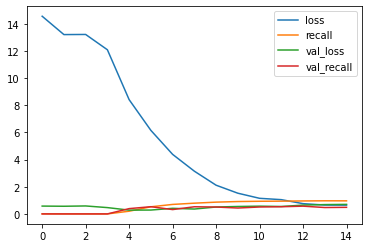

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 23s 35ms/step - loss: 0.2199 - recall: 0.5343


[0.21987995505332947, 0.5342725515365601]

In [ ]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 3s 36ms/step - loss: 0.2792 - recall: 0.3902


[0.2791939079761505, 0.39024388790130615]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 32ms/step
[[1811   44]
 [ 250  160]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1855
           1       0.78      0.39      0.52       410

    accuracy                           0.87      2265
   macro avg       0.83      0.68      0.72      2265
weighted avg       0.86      0.87      0.85      2265



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 23s 37ms/step
[[16480   205]
 [ 1719  1972]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     16685
           1       0.91      0.53      0.67      3691

    accuracy                           0.91     20376
   macro avg       0.91      0.76      0.81     20376
weighted avg       0.91      0.91      0.90     20376



71/71 [==============================] - 2s 32ms/step


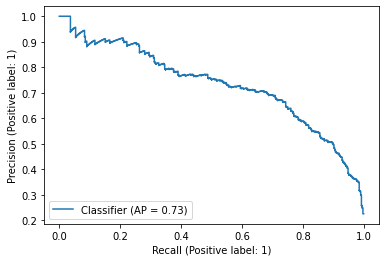

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7327545691608478

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score,accuracy_score

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)
DL_acc = accuracy_score(y_test,y_pred)

## BERT Modeling

In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

### Read Data

In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.4 MB/s eta 0:00:00


In [6]:
df4 = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df4.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
df5 = df4.copy()

In [8]:
df4 = df4[['Review Text','Recommended IND']]
df4

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [9]:
df4= df4.dropna()

In [10]:
df4.drop_duplicates(keep='first', inplace=True)

In [11]:
df4['Recommended IND'] = df4['Recommended IND'].map({1:0, 0:1})

In [12]:
df4['Recommended IND'].value_counts(normalize=True)

0    0.818857
1    0.181143
Name: Recommended IND, dtype: float64

### Train test split

In [13]:
X = df4['Review Text'].values
y = df4['Recommended IND'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [57]:
from transformers import BertTokenizer, BertModel,  AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


### Fixing token counts of all documents

In [16]:
# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [17]:
encoded_sent = tokenizer.encode(
        str(sent),                       
        add_special_tokens = True)

In [18]:
np.array(max_token).mean()

76.75947689316956

In [19]:
sum(np.array(max_token) <= 131) / len(max_token)

0.969912520986127

### Transformation Vectors to Matrices

In [20]:
sentence = "absolutely wonderful silky sexy comfortable"
tokens = tokenizer.encode_plus(sentence, add_special_tokens=True)
print(tokens)

{'input_ids': [101, 7078, 6919, 18848, 7916, 6625, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [21]:
tokens = tokenizer.encode_plus(sentence, max_length=131, truncation=True,
                              padding='max_length', add_special_tokens=True)
tokens

{'input_ids': [101, 7078, 6919, 18848, 7916, 6625, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [22]:
np.array(tokens['input_ids'])

array([  101,  7078,  6919, 18848,  7916,  6625,   102,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [23]:
np.array(tokens['attention_mask'])

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
def transformation(X):
  # set array dimensions
  seq_len = 131

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayısı, 160) boyutlarında matrixlere dönüştürüyoruz.

In [25]:
def transformation(X):
  # set array dimensions
  seq_len = 131

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask listelerini np.array ile (yorum sayısı, 160) boyutlarında matrixlere dönüştürüyoruz.
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

In [26]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test = transformation(X_test)

In [27]:
Xids_train

array([[ 101, 1996, 6546, ...,    0,    0,    0],
       [ 101, 2023, 2422, ...,    0,    0,    0],
       [ 101, 7078, 2293, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 7168, ...,    0,    0,    0],
       [ 101, 2023, 2003, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [28]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20370, 131)
Xmask_train.shape : (20370, 131)
Xids_test.shape   : (2264, 131)
Xmask_test.shape  : (2264, 131)


In [29]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
from tensorflow.keras.utils import to_categorical

l = np.array([0, 1, 3, 5, 4, 2])
to_categorical(l, 6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

### Transformation Matrix to Tensorflow tensor

In [34]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(131,), dtype=tf.int64, name=None), TensorSpec(shape=(131,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [35]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(131,), dtype=tf.int64, name=None), TensorSpec(shape=(131,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [36]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [37]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

In [38]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(131,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(131,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [39]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(131,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(131,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [40]:
batch_size = 32

# BERT modeli geliştiren developerlar tarafından batch_size olarak 16 ve 32 sayıları tavsiye edilmiştir.

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [41]:
train_ds

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 131), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 131), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [42]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00


In [43]:
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1911
191


### Creating optimization

In [44]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')  

### Creating Model

In [58]:
def create_model():
    from transformers import TFAutoModel
    # BERTTürk modeli sadece pytorch tensörleri üzerinden eğitildiğinden modelin Tensorflow kütüphanesi ile çalışabilmesi için AutoModel yerine TFAutoModel yazıyoruz.
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased") 
    

    input_ids = Input(shape=(131,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(131,), name='attention_mask', dtype='int32')
    # inputlarımız token embeddings (input_ids) ve position embeddings (attention_mask)'den oluştuğundan herbiri için bir input layer oluşturuyoruz.
    # Her bir gözlem için input layerlarımızın boyutlarını (shape= (131,)) veriyoruz.
    # modelin bu layerları biribirinden ayırt edebilmesi için name olarak map_func fonksiyonu içinde belirlediğimiz isimleri kullanıyoruz. Farklı isimler kullanılırsa model 
    # hata döndürür.
    # BERT modelleri dtype= "int32" olarak çalışır. Bu sebeple dtype="int32" olarak belirtiyoruz.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # embeddings layer, BERT model üzerinde daha önce eğitilip hafızasında tutulan word embeddingleri çektiğimiz katmandır.
    # Çekilen Word embeddingler birleştirilerek sentence embeddinglere dönüştürülür. 
    # Elde ettiğimiz sentence embeddinglerin olumlu mu olumsuz mu olduğuna dair eğitimimizi Dense layer üzerinde yapacağız.

    x = Dense(131, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) #0.1 oranı developerlar tarafından tavsiye edilen orandır.
    y = Dense(1, activation='sigmoid', name='outputs')(x) # outputumuz döndürüyor.

    # Dikkat ettiyseniz burda Sequential API yerine Functional API kullanıyoruz. 
    # Functional API'de bir önceki layerdaki bilgileri bir sonraki layera aktarma işlemini aktarma yapacağımız layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini 
    # yazarak yapıyoruz.
    # Embeddings layerdan elde ettiğimiz sentence embeddingsleri Dense layer'a göndermek için Dense() layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini yazıyoruz
    # Aynen burda olduğu gibi "Dense(160, activation='relu')(embeddings)". Bu sayede embeddings layerdaki bilgiler Dense layera aktarılmış oldu.
    # Hatırlarsanız bu işlem Sequential API'de model.add(embeddings) olarak yapılıyordu.

    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son aşamada elde ettiğimiz input ve outputlar Model fonksiyonu içine tanımlanır.

In [59]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = optimizer
  #optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) ==> yukarıda tanımladığımız optimizer'ı kullanmasaydık bu şekilde de optimizer'ı tanımlayabilirdik. 
  # Ama çok rahat overfiting olma riski vardır
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [60]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 131)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 131)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 131,                                         

### Model Fiting

In [61]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
637/637 [==============================] - 191s 185ms/step - loss: 0.5906 - recall_5: 0.8192 - val_loss: 0.5287 - val_recall_5: 0.8829
Epoch 2/3
637/637 [==============================] - 64s 100ms/step - loss: 0.4759 - recall_5: 0.8686 - val_loss: 0.5836 - val_recall_5: 0.8878
Epoch 3/3
637/637 [==============================] - 63s 98ms/step - loss: 0.4194 - recall_5: 0.8924 - val_loss: 0.4177 - val_recall_5: 0.8317


### Model evaluation

In [62]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_5,val_loss,val_recall_5
0,0.590620,0.819241,0.528666,0.882927
1,0.475886,0.868564,0.583615,0.887805
2,0.419421,0.892412,0.417736,0.831707


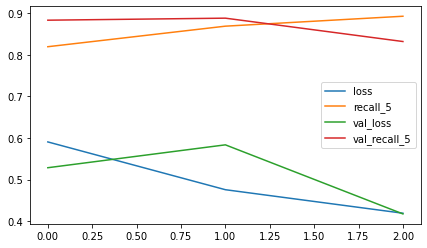

In [63]:
model_loss.plot()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 28s 177ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1854
           1       0.75      0.83      0.79       410

    accuracy                           0.92      2264
   macro avg       0.86      0.89      0.87      2264
weighted avg       0.92      0.92      0.92      2264



### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [66]:
nb_count_f1= 0.6657729949336719
log_count_f1= 0.6865805790867633
svc_count_f1= 0.688326427073671
rf_count_f1= 0.6627090738781354
ada_count_f1= 0.6285846973533109
nb_tfidf_f1= 0.6088915626164643
log_tfidf_f1= 0.689727680213284
nb_count_rec= 0.6442073170731708
log_count_rec= 0.7823170731707318
svc_count_rec= 0.8207317073170731
rf_count_rec= 0.7823170731707317
ada_count_rec= 0.572560975609756
nb_tfidf_rec= 0.5676829268292682
log_tfidf_rec= 0.8445121951219512
svc_tfidf_rec= 0.8536585365853657
rf_tfidf_rec= 0.7871951219512195
ada_tfidf_rec= 0.5506097560975609
DL_rec= 0.53
nb_count_acc= 0.8827534923167507
log_count_acc= 0.8703276783072141
svc_count_acc= 0.8650809509718081
rf_count_acc= 0.8555264787623822
ada_count_acc= 0.8774513028118527
nb_tfidf_acc= 0.8677858757561984
log_tfidf_acc=0.8621535063500827
svc_tfidf_acc= 0.8418296414483619
rf_tfidf_acc= 0.8374115823802362
ada_tfidf_acc= 0.8722611969212088
DL_acc= 0.9055
svc_tfidf_f1 = 0.6619105345701314
rf_tfidf_f1= 0.6371935492200181
ada_tfidf_f1= 0.6096472394113984
DL_f1= 0.67
bert_f1=0.79
bert_recall= 0.83
bert_acc=0.86



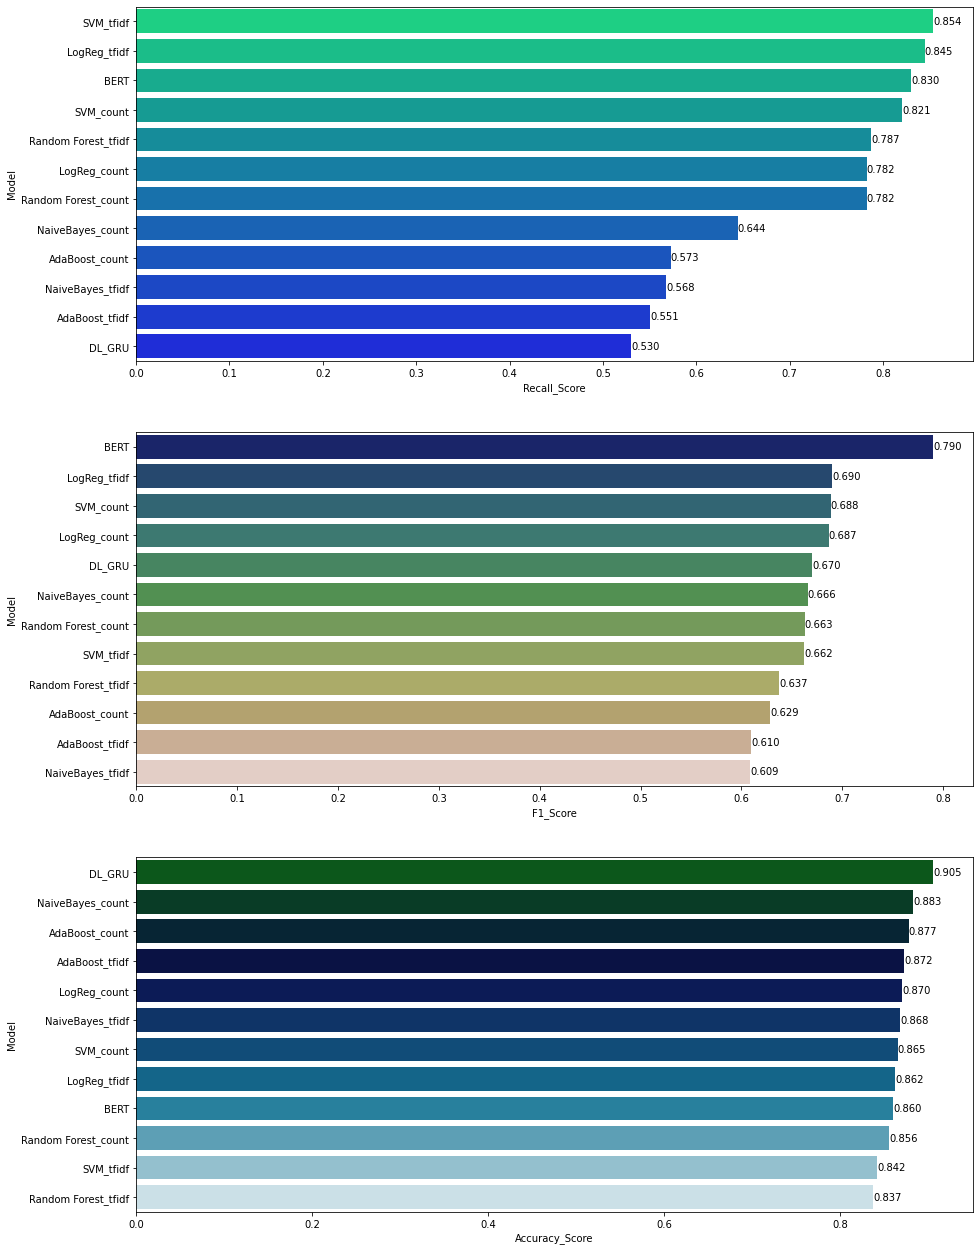

In [67]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL_GRU", 'BERT'],
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1,bert_f1 ],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec,bert_recall],
                        "Accuracy_Score": [nb_count_acc, log_count_acc, svc_count_acc, 
                                                   rf_count_acc, ada_count_acc, 
                                                  nb_tfidf_acc, log_tfidf_acc, svc_tfidf_acc, 
                                                  rf_tfidf_acc, ada_tfidf_acc, DL_acc, bert_acc]})
                        
                        

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="gist_earth")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy_Score", ascending=False)
ax=sns.barplot(x="Accuracy_Score", y="Model", data=compare, palette="ocean")
labels(ax)

plt.show();

### Conclusion

The goal of this project is to predict whether customers recommend the product they purchased using the information in their review text. With regard to commercial perspertive, it is important to evaluate non-recommend reviews in order to understand negatives to change them positives. Thus, in this project, I focused on non- recommend values by assigning them '1'. comparing the resuls, best recall score is SVM-tf-idf, best f1 score is Logistic Regressin-tf-idf and best Accuracy score is Deep learning model. As a final model, I would choose BERT Model, since it has best recall score or close the best scores overall. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___